## Restricted Boltzmann Machines

In [1]:
%pylab inline
# import numpy
import numpy as np
from tqdm import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
training_data_movies = np.array([[1,1,1,0,0,0],[1,0,1,0,0,0],[1,1,1,0,0,0],[0,0,1,1,1,0], [0,0,1,1,0,0],[0,0,1,1,1,0]])
input_s = training_data_movies
movies = ["Harry Potter","Avatar","LOTR","Gladiator","Titanic","Glitter"]

Now let's build a class.

In [28]:
class rbm2(object):
    def __init__(self, input_size, feature_size, learning_rate=0.1):
        self.inpsize = input_size
        self.feasize = feature_size
        self.lr = learning_rate
        self.weights = np.random.normal(0, 1, (input_size, feature_size))
        bj = np.random.normal(0, 1, (1, feature_size))
        self.sigmoid = np.vectorize(self.sigmoid)
        self.schmitt = np.vectorize(self.schmitt)

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def schmitt(self, x):
        rand_val = np.random.rand(1)
        return (1 if rand_val <= x else 0)
#         return (0 if x <= 0.5 else 1)

    def feed_f(self, ival):
        # No biases yet
        hi = self.schmitt(self.sigmoid(np.dot(ival, self.weights)))
        input_act = [np.tile(ival[i], (self.feasize, 1)).T for i in xrange(0, len(ival))]
        output_act = [np.tile(hi[i], (self.inpsize, 1)) for i in xrange(0, len(hi))]
        total_act = [np.multiply(self.lr, np.multiply(input_act[i], output_act[i])) for i in xrange(0, len(input_act))]
        return total_act, hi

    def feed_b(self, hi):
        ival = self.schmitt(self.sigmoid(np.dot(hi, self.weights.T)))
        input_act = [np.tile(ival[i], (self.feasize, 1)).T for i in xrange(0, len(ival))]
        output_act = [np.tile(hi[i], (self.inpsize, 1)) for i in xrange(0, len(hi))]
        total_act = [np.multiply(self.lr, np.multiply(input_act[i], output_act[i])) for i in xrange(0, len(input_act))]
        return total_act, ival
    
    def train_epoch(self, ival, cd_chain):
        pos_act, hi = self.feed_f(ival)
        neg_act, ival_prime = self.feed_b(hi)
#         neg_act, ival_prime = self.feed_b(np.random.randint(2, size=hi.shape))
        
        for i in xrange(1, cd_chain):
            _, hi2 = self.feed_f(ival_prime)
            neg_act, ival_prime = self.feed_b(hi2)
        
        for i in xrange(0, len(pos_act)):
            self.weights += (pos_act[i]-neg_act[i])/len(pos_act)
        
        # Return some indicator of adjustments being made
        return np.sum(pos_act), np.sum(neg_act)
    
#     def train(self, input_s, cd_chain, epochs=100):
        
        

In [95]:
np.random.seed(2)
rbm2i = rbm2(6, 2, 0.01)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.97it/s]


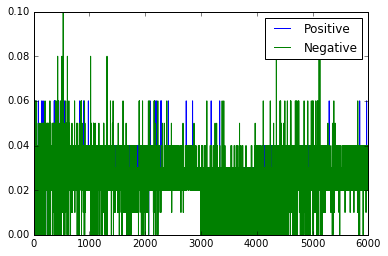

In [96]:
pos = []
neg = []
s_input = input_s[:]
for i in tqdm(xrange(0, len(input_s))):
    for j in xrange(0, 1000):
        p, n = rbm2i.train_epoch(input_s[i:(i+1)], 2)
        pos.append(p)
        neg.append(n)

# for j in tqdm(xrange(0, 500)):
#     for i in xrange(0, len(input_s)):
#         p, n = rbm2i.train_epoch(input_s[i:(i+1)], 2)
#         pos.append(p)
#         neg.append(n)
        
plot(pos, label="Positive")
plot(neg, label="Negative")
legend()

In [98]:
# Let's look for learned parameters here
for i in xrange(0, rbm2i.feasize):
    hip = np.zeros(rbm2i.feasize)
    hip[i] = 1
    print "Features: %s" % hip
    _, vi = rbm2i.feed_b([hip])
    print "Output: %s" % vi
    mv = ""
    for i in xrange(0, len(movies)): 
        if vi[0,i]!=0: 
            mv += " "+movies[i]
    print "Movies: %s" % mv

Features: [ 1.  0.]
Output: [[0 0 1 1 1 0]]
Movies:  LOTR Gladiator Titanic
Features: [ 0.  1.]
Output: [[1 1 1 0 0 0]]
Movies:  Harry Potter Avatar LOTR


In [77]:
np.random.rand(1)

array([ 0.4488663])